In [1]:
from astropy.table import Table  
import numpy as np

data_table = Table.read('/home/douglas/Gala-code/correctactions.fits', format = 'fits') 
print(data_table[1].columns)

<TableColumns names=('idx','Jr','Jphi','Jz','Theta_r','Theta_phi','Theta_z','Freq_r','Freq_phi','Freq_z')>


In [2]:
marchetti = Table.read('/home/douglas/data.fits', format = 'fits')
print(marchetti[1].columns)

<TableColumns names=('source_id','ra','dec','parallax','e_parallax','pmra','e_pmra','pmdec','e_pmdec','vrad','e_vrad','GMag','dist','el_dist','eu_dist','rGC','el_rGC','eu_rGC','RGC','el_RGC','eu_RGC','xGC','el_xGC','eu_xGC','yGC','el_yGC','eu_yGC','zGC','el_zGC','eu_zGC','U','el_U','eu_U','V','el_V','eu_V','W','el_W','eu_W','UW','el_UW','eu_UW','vR','el_vR','eu_vR','vtot','el_vtot','eu_vtot','P_ub')>


In [3]:
Jr = np.array(data_table["Jr"][:119629])
Jphi = np.array(data_table["Jphi"][:119629])
Jz = np.array(data_table["Jz"][:119629])
Or = np.array(data_table["Freq_r"][:119629])
Ophi = np.array(data_table["Freq_phi"][:119629])
Oz = np.array(data_table["Freq_z"][:119629])
idx = np.array(data_table["idx"][:119629])

In [4]:
X = []
Y = []
Z = []
U = []
V = []
W = []

for i in idx:
    X.append(marchetti["xGC"][i]*0.001)
    Y.append(marchetti["yGC"][i]*0.001)
    Z.append(marchetti["zGC"][i]*0.001)
    U.append(marchetti["U"][i])
    V.append(marchetti["V"][i])
    W.append(marchetti["W"][i])

X = np.array(X)
Y = np.array(Y)
Z = np.array(Z)
U = np.array(U)
V = np.array(V)
W = np.array(W)

In [5]:
orbitvalues = Table.read('/home/douglas/Gala-code/correctorbitvalues.fits', format = 'fits') 

In [6]:
zmax = orbitvalues["zmax"]
rmax = orbitvalues["maxr"]
rmin = orbitvalues["minr"]

/home/douglas/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:2: RuntimeWarning: invalid value encountered in log10
  


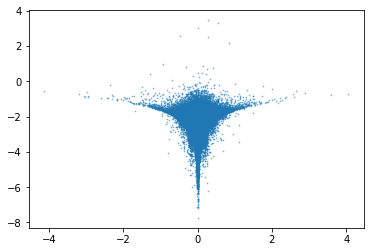

In [8]:
import matplotlib.pyplot as plt
plt.scatter(Z, np.log10(Jz), s=0.5, alpha=0.5)

Text(0,0.5,'$|J_z\\ /\\ J_{\\phi}|$')

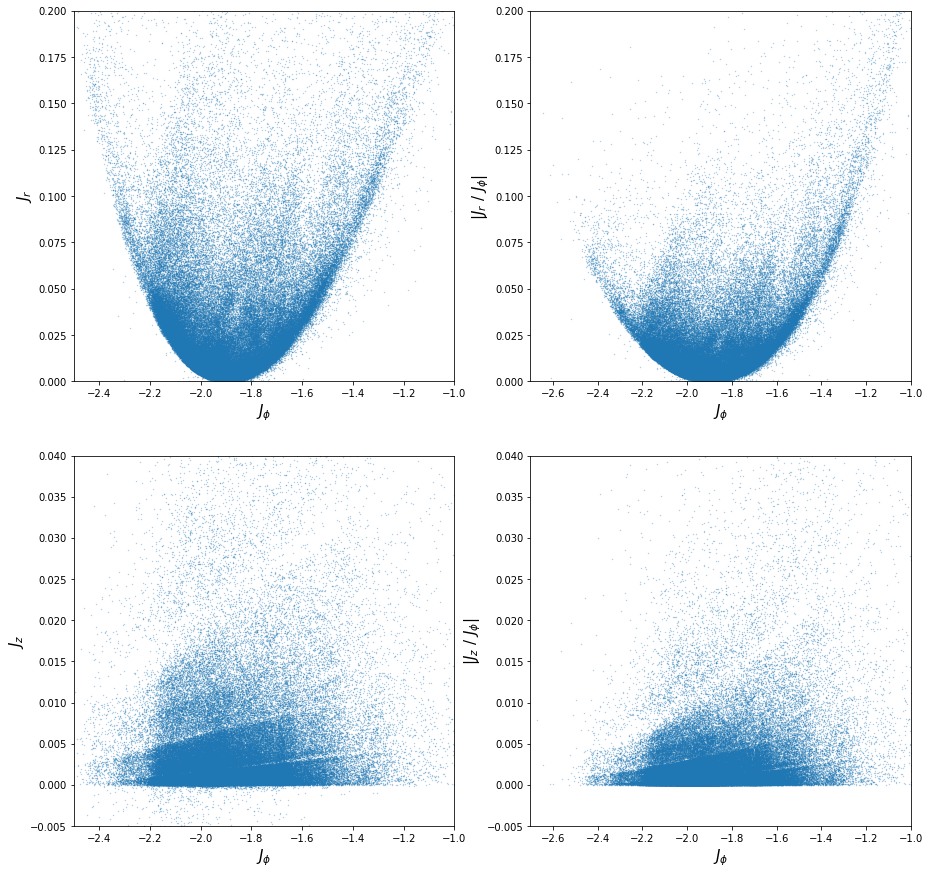

In [9]:
fig, axs = plt.subplots(2,2, figsize=(15,15))

axs[0, 0].scatter(Jphi, Jr, s=0.1, alpha=0.5)
axs[0, 0].axis([-2.5, -1, 0, 0.2])
axs[0, 0].set_xlabel("$J_{\phi}$",fontsize=15)
axs[0, 0].set_ylabel("$J_r$",fontsize=15)

axs[0, 1].scatter(Jphi,np.abs(Jr/Jphi),s=0.1, alpha=0.5)
axs[0, 1].axis([-2.7, -1, 0, 0.2])
axs[0, 1].set_xlabel("$J_{\phi}$",fontsize=15)
axs[0, 1].set_ylabel("$|J_r\ /\ J_{\phi}|$",fontsize=15)

axs[1, 0].scatter(Jphi, Jz, s=0.1, alpha=0.5)
axs[1, 0].axis([-2.5, -1, -0.005, 0.04])
axs[1, 0].set_xlabel("$J_{\phi}$",fontsize=15)
axs[1, 0].set_ylabel("$J_z$",fontsize=15)

axs[1, 1].scatter(Jphi,np.abs(Jz/Jphi),s=0.1, alpha=0.5)
axs[1, 1].axis([-2.7, -1, -0.005, 0.04])
axs[1, 1].set_xlabel("$J_{\phi}$",fontsize=15)
axs[1, 1].set_ylabel("$|J_z\ /\ J_{\phi}|$",fontsize=15)

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


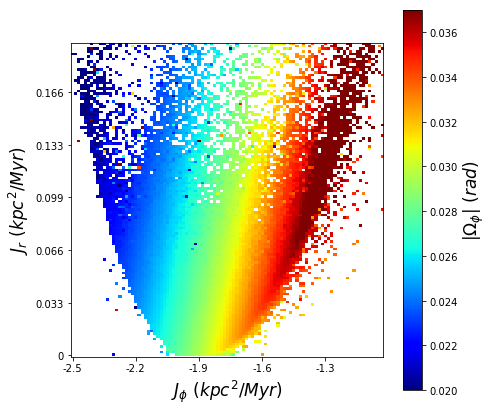

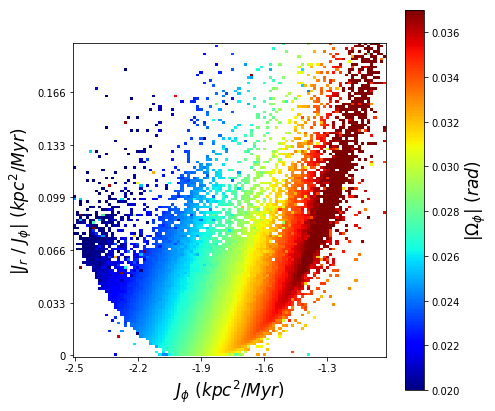

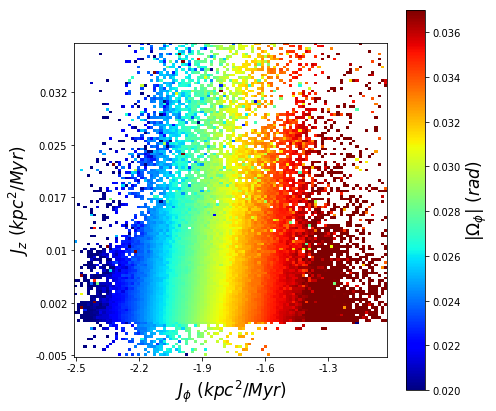

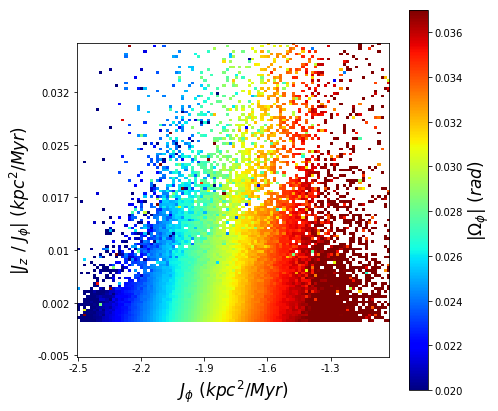

In [10]:
xmin = -2.5
xmax = -1
for i in range (0,4):
    if i == 0:
        ymin = 0
        ymax = 0.2
        step = 0.0016667
        x = Jphi
        y = Jr
        w = Ophi
        ylabel = '$J_r\ (kpc^2/Myr)$'
    elif i == 1:
        ymin = 0
        ymax = 0.2
        step = 0.0016667
        x = Jphi
        y = np.abs(Jr/Jphi)
        w = Ophi 
        ylabel = '$|J_r\ /\ J_{\phi}|\ (kpc^2/Myr)$'
    elif i == 2:
        ymin = -0.005
        ymax = 0.04
        step = 0.000375
        x = Jphi
        y = Jz
        w = Ophi 
        ylabel = '$J_z\ (kpc^2/Myr)$'
    else:
        ymin = -0.005
        ymax = 0.04
        step = 0.000375
        x = Jphi
        y = np.abs(Jz/Jphi)
        w = Ophi 
        ylabel = '$|J_z\ /\ J_{\phi}|\ (kpc^2/Myr)$'
    
    bin_x = np.arange(xmin,xmax, step=0.015)           ## 100
    bin_y = np.arange(ymin, ymax, step=step)           ## 120
    H, xed, yed = np.histogram2d(x, y, bins=(bin_x,bin_y))
    color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (x>bin_x[j]) & (x<bin_x[j+1]) 
                               & (y>bin_y[k]) & (y< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    plt.figure(figsize=(7,7))
    T = plt.imshow(color_func, cmap = 'jet',origin='lower',vmin = 0.020 ,vmax = 0.037)
    cbar = plt.colorbar(T)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
    cbar.set_label('$|\Omega_{\phi}|\  (rad)$',size=17)
    plt.xlabel("$J_{\phi}\ (kpc^2/Myr)$", fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.xticks(np.arange(0,100,step=20),('-2.5','-2.2','-1.9','-1.6','-1.3','-1'))
    if i == 0 or i == 1:
        plt.yticks(np.arange(0,120,step=20),('0','0.033','0.066','0.099','0.133','0.166','0.2'))
    elif i == 2 or i == 3:
        plt.yticks(np.arange(0,120,step=20),('-0.005','0.002','0.01','0.017','0.025','0.032','0.04'))

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


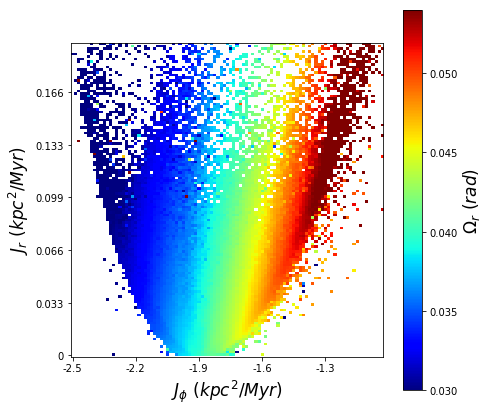

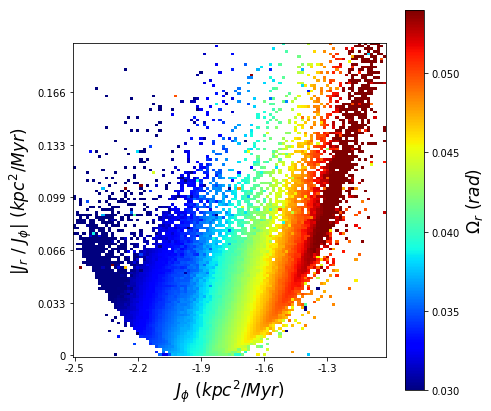

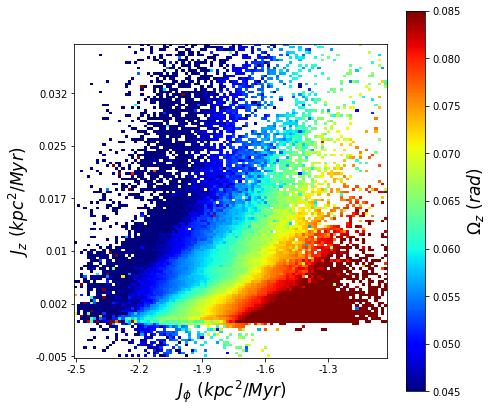

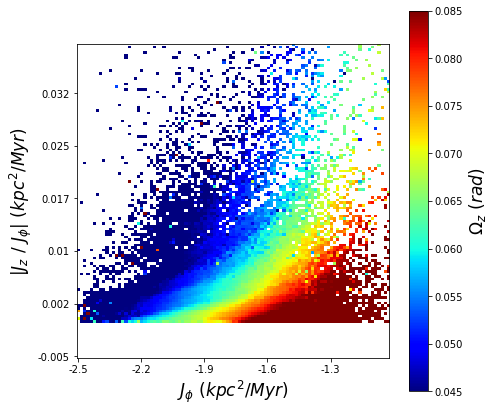

In [19]:
for i in range (0,4):
    if i == 0:
        ymin = 0
        ymax = 0.2
        vmin = 0.03
        vmax = 0.054
        step = 0.0016667
        x = Jphi
        y = Jr
        w = Or
        ylabel = '$J_r\ (kpc^2/Myr)$'
        label = '$\Omega_{r}\ (rad)$'
    elif i == 1:
        ymin = 0
        ymax = 0.2
        step = 0.0016667
        x = Jphi
        y = np.abs(Jr/Jphi)
        w = Or
        ylabel = '$|J_r\ /\ J_{\phi}|\ (kpc^2/Myr)$'
    elif i == 2:
        ymin = -0.005
        ymax = 0.04
        vmin = 0.045
        vmax = 0.085
        step = 0.000375
        x = Jphi
        y = Jz
        w = Oz 
        ylabel = '$J_z\ (kpc^2/Myr)$'
        label = '$\Omega_{z}\ (rad)$'
    else:
        ymin = -0.005
        ymax = 0.04
        step = 0.000375
        x = Jphi
        y = np.abs(Jz/Jphi)
        w = Oz
        ylabel = '$|J_z\ /\ J_{\phi}|\ (kpc^2/Myr)$'
    
    bin_x = np.arange(xmin,xmax, step=0.015)           ## 100
    bin_y = np.arange(ymin, ymax, step=step)           ## 120
    H, xed, yed = np.histogram2d(x, y, bins=(bin_x,bin_y))
    color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (x>bin_x[j]) & (x<bin_x[j+1]) 
                               & (y>bin_y[k]) & (y< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    plt.figure(figsize=(7,7))
    T = plt.imshow(color_func, cmap = 'jet',origin='lower',vmin = vmin ,vmax = vmax)
    cbar = plt.colorbar(T)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
    cbar.set_label(label,size=17)
    plt.xlabel("$J_{\phi}\ (kpc^2/Myr)$", fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.xticks(np.arange(0,100,step=20),('-2.5','-2.2','-1.9','-1.6','-1.3','-1'))
    if i == 0 or i == 1:
        plt.yticks(np.arange(0,120,step=20),('0','0.033','0.066','0.099','0.133','0.166','0.2'))
    elif i == 2 or i == 3:
        plt.yticks(np.arange(0,120,step=20),('-0.005','0.002','0.01','0.017','0.025','0.032','0.04'))

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


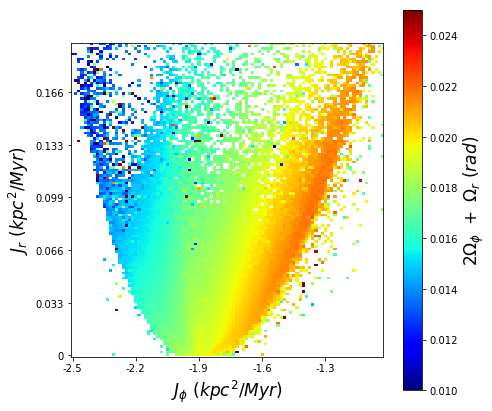

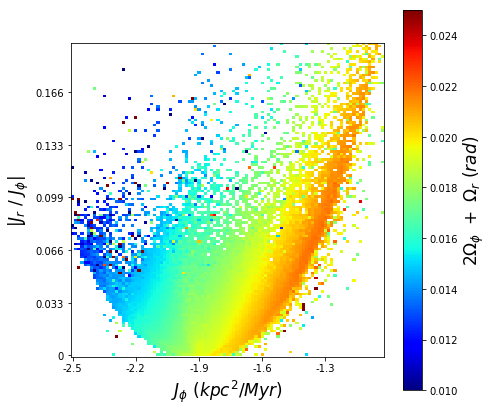

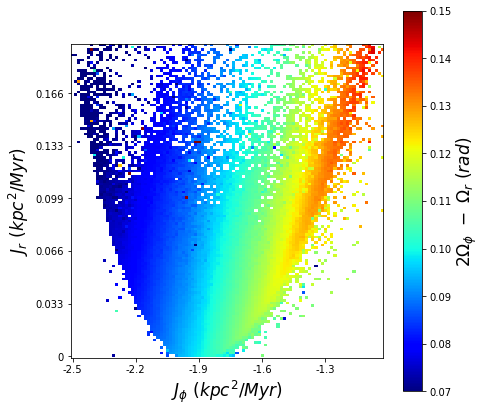

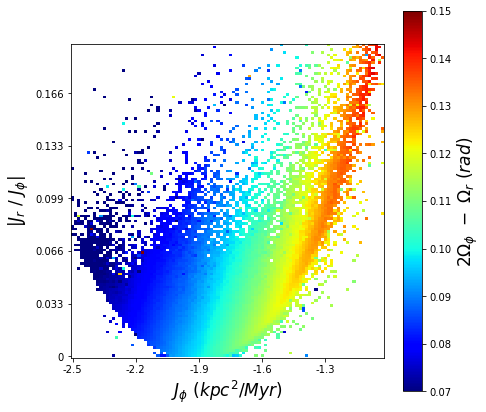

In [24]:
xmin = -2.5
xmax = -1
ymin = 0
ymax = 0.2
for i in range (0,4):
    if i == 0:
        vmin = 0.01
        vmax = 0.025
        step = 0.0016667
        x = Jphi
        y = Jr
        w = 2*Ophi + Or
        ylabel = '$J_r\ (kpc^2/Myr)$'
        label = '$2\Omega_{\phi}\ +\ \Omega_{r}\ (rad)$'
    elif i == 1:
        y = np.abs(Jr/Jphi)
        w = 2*Ophi + Or
        ylabel = '$|J_r\ /\ J_{\phi}|$'
    elif i == 2:
        vmin = 0.07
        vmax = 0.15
        y = Jr
        w = 2*Ophi - Or
        ylabel = '$J_r\ (kpc^2/Myr)$'
        label = '$2\Omega_{\phi}\ -\ \Omega_{r}\ (rad)$'
    else:
        y = np.abs(Jr/Jphi)
        w = 2*Ophi - Or
        ylabel = '$|J_r\ /\ J_{\phi}|$'
    
    bin_x = np.arange(xmin,xmax, step=0.015)           ## 100
    bin_y = np.arange(ymin, ymax, step=step)           ## 120
    H, xed, yed = np.histogram2d(x, y, bins=(bin_x,bin_y))
    color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (x>bin_x[j]) & (x<bin_x[j+1]) 
                               & (y>bin_y[k]) & (y< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    plt.figure(figsize=(7,7))
    T = plt.imshow(color_func, cmap = 'jet',origin='lower',vmin = vmin ,vmax = vmax)
    cbar = plt.colorbar(T)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
    cbar.set_label(label,size=17)
    plt.xlabel("$J_{\phi}\ (kpc^2/Myr)$", fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.xticks(np.arange(0,100,step=20),('-2.5','-2.2','-1.9','-1.6','-1.3','-1'))
    plt.yticks(np.arange(0,120,step=20),('0','0.033','0.066','0.099','0.133','0.166','0.2'))

In [12]:
kpc2myr_to_kpc2s = 1/(3.1536e13)
kms_to_kpcs = 3.2408e-17

rcirc = np.abs(Jphi*kpc2myr_to_kpc2s/(V*kms_to_kpcs))  #wrong?

print(rcirc)

[8.07110383 8.06233307 8.06481805 ... 7.9530083  7.99461312 8.07008208]


In [28]:
print(Jr)

[0.15295235 0.04645195 0.05069527 ... 0.00209915 0.00487837 0.05633109]


/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


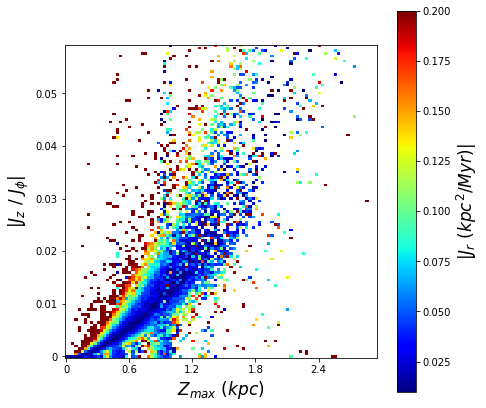

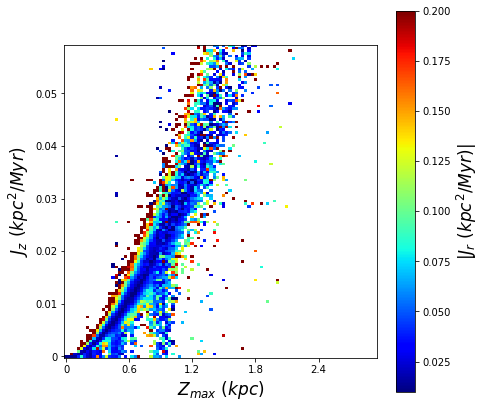

In [34]:
for i in range (0,2):
    if i == 0:
        xmin = 0
        xmax = 3
        ymin = 0
        ymax = 0.06
        vmin = 0.01
        vmax = 0.2
        x = zmax
        y = np.abs(Jz/Jphi)
        w = Jr
        ylabel = '$|J_z\ /\ J_{\phi}|$'
        label = '$|J_r\ (kpc^2/Myr)|$'
    else:
        y = Jz
        ylabel = '$J_z\ (kpc^2/Myr)$'
    
    bin_x = np.arange(xmin,xmax, step=0.03)           ## 100
    bin_y = np.arange(ymin, ymax, step=0.0005)        ## 120
    H, xed, yed = np.histogram2d(x, y, bins=(bin_x,bin_y))
    color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (x>bin_x[j]) & (x<bin_x[j+1]) 
                               & (y>bin_y[k]) & (y< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    plt.figure(figsize=(7,7))
    T = plt.imshow(color_func, cmap = 'jet',origin='lower',vmin = vmin ,vmax = vmax)
    cbar = plt.colorbar(T)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
    cbar.set_label(label,size=17)
    plt.xlabel("$Z_{max}\ (kpc)$", fontsize=17)
    plt.ylabel(ylabel, fontsize=17)
    plt.xticks(np.arange(0,100,step=20),('0','0.6','1.2','1.8','2.4','3'))
    plt.yticks(np.arange(0,120,step=20),('0','0.01','0.02','0.03','0.04','0.05','0.06'))

Text(0,0.5,'$J_z\\ (kpc^2/{Myr})$')

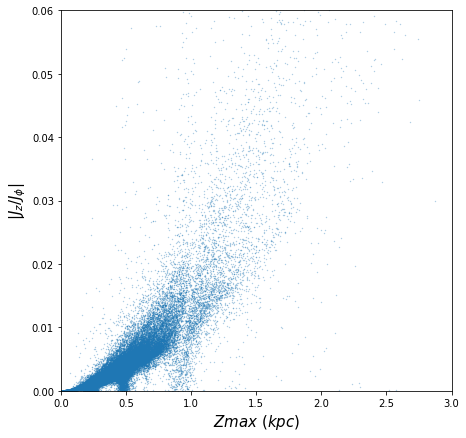

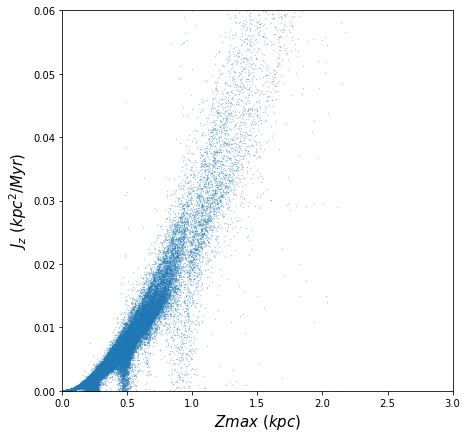

In [13]:
plt.figure(figsize=(7,7))
plt.scatter(zmax, np.abs(Jz/Jphi), s=0.1, alpha=0.5)
plt.xlim(0,3)
plt.ylim(0,0.06)
plt.xlabel("$Zmax\ (kpc)$",fontsize=15)
plt.ylabel("$|J_z/J_{\phi}|$", fontsize=15)

plt.figure(figsize=(7,7))
plt.scatter(zmax, Jz, s=0.1, alpha=0.5)
plt.xlim(0,3)
plt.ylim(0,0.06)
plt.xlabel("$Zmax\ (kpc)$",fontsize=15)
plt.ylabel("$J_z\ (kpc^2/{Myr})$", fontsize=15)

Text(0,0.5,'$|J_r\\ /\\ {J_{\\phi}}|$')

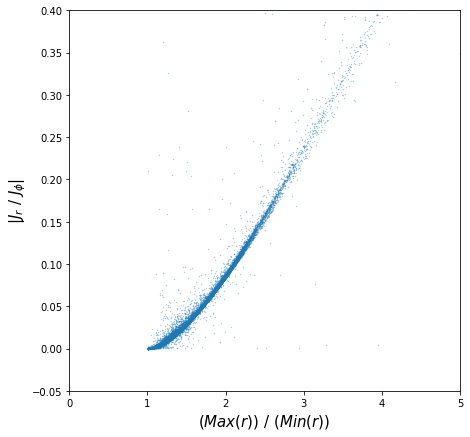

In [36]:
zmax=np.array(zmax)
maxr=np.array(rmax)
minr=np.array(rmin)

plt.figure(figsize=(7,7))
plt.scatter(np.abs(maxr/minr), np.abs(Jr/Jphi), s=0.1, alpha=0.5)
plt.xlim(0,5)
plt.ylim(-0.05,0.4)
plt.xlabel("$(Max(r))\ /\ (Min(r))$",fontsize=15)
plt.ylabel("$|J_r\ /\ {J_{\phi}}|$", fontsize=15)

Text(0,0.5,'$J_r$')

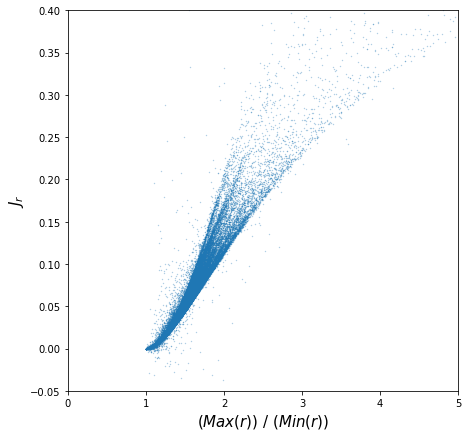

In [16]:
plt.figure(figsize=(7,7))
plt.scatter(np.abs(maxr/minr), Jr, s=0.1, alpha=0.5)
plt.xlim(0,5)
plt.ylim(-0.05,0.4)
plt.xlabel("$(Max(r))\ /\ (Min(r))$",fontsize=15)
plt.ylabel("$J_r$", fontsize=15)

Text(0,0.5,'$|J_r\\ /\\ {J_{\\phi}}|$')

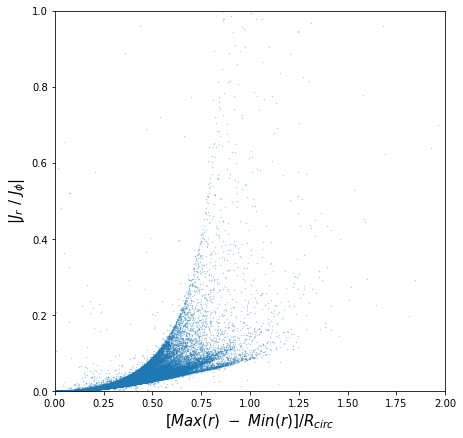

In [37]:
plt.figure(figsize=(7,7))
plt.scatter((maxr-minr)/rcirc, np.abs(Jr/Jphi), s=0.1, alpha=0.5)
plt.xlim(0,2)
plt.ylim(0,1)
plt.xlabel("$[Max(r)\ -\ Min(r)]\ /\ R_{circ}$",fontsize=15)
plt.ylabel("$|J_r\ /\ {J_{\phi}}|$", fontsize=15)

/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/fromnumeric.py:2957: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/home/douglas/anaconda3/lib/python3.6/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


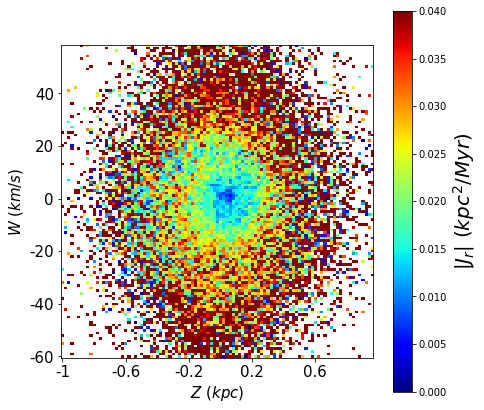

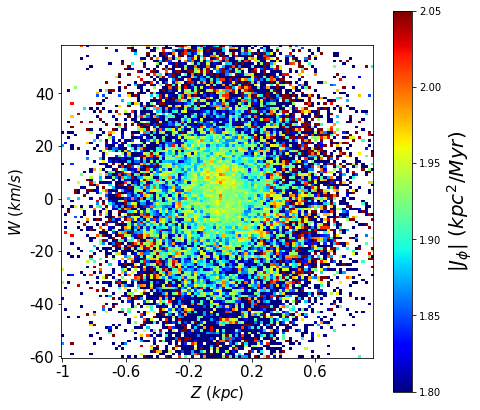

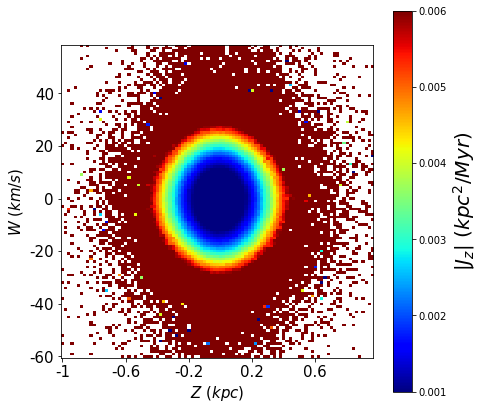

In [18]:
##############################################################################
# Creating bins and 2d Hist for xed and yed.
bin_x = np.arange(-1,1, step=0.02)   ## 100
bin_y = np.arange(-60,60, step=1)    ## 120
H, xed, yed = np.histogram2d(Z, W, bins=(bin_x,bin_y))

##############################################################################
# Creating my empty 2-D array that will be my color function
color_func = np.ndarray(shape=(len(yed)-1,len(xed)-1))

##############################################################################
# Loop to index each point; calculate its mean Vphi and set it to array

for i in range (0,3):
    if i == 0:
        w = Jr 
        vmin = 0
        vmax = 0.04
        label = '$|J_r|\  (kpc^{2}/Myr)$'
    elif i == 1:
        w = Jphi
        vmin = 1.8
        vmax = 2.05
        label = '$|J_{\phi}|\  (kpc^{2}/Myr)$'
    elif i == 2:
        w = Jz
        vmin = 0.001
        vmax = 0.006
        label = '$|J_{z}|\  (kpc^{2}/Myr)$'
    
    for j in range(0, len(bin_x)-1):
        for k in range(0, len(bin_y)-1):
            ichoose = np.where( (Z>bin_x[j]) & (Z<bin_x[j+1]) 
                               & (W>bin_y[k]) & (W< bin_y[k+1]))

            color_func[k,j] = np.abs(np.median(w[ichoose]))

    ##############################################################################
    # Setting figure size and plotting mean_Vphi with colorbar. Selected v-values 
    # for ease of seing spiral. Actual range between 180 and 250.
    plt.figure(figsize=(7,7))
    T = plt.imshow(color_func, cmap = 'jet',origin='lower',vmin = vmin ,vmax = vmax)
    cbar = plt.colorbar(T)

    ##############################################################################
    # Setting aspect as 100/120 (bin_x/bin_y) so the image is a square
    plt.gca().set_aspect(aspect='0.833333333333333',adjustable='box')
    cbar.set_label(label,size=20)
    plt.xlabel("$Z\ (kpc)$", fontsize=15)
    plt.ylabel("$W\ (km/s)$", fontsize=15)
    plt.xticks(np.arange(0,100,step=20),('-1','-0.6','-0.2','0.2','0.6','1'),fontsize=15)
    plt.yticks(np.arange(0,120, step =20), ('-60','-40','-20','0','20','40','60'), fontsize=15)